<a href="https://colab.research.google.com/github/beltranovich/MBID-08_-_Visualizacion-de-Datos/blob/main/MBID_08_AG3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importación de las librerias requeridas para la actividad guiada #3
import pandas as pd
import io
import requests
import seaborn as sns
import timeit
import matplotlib.pyplot as plt

In [3]:
# Creación del Dataframe cargando datos de un archivo csv en linea
url="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
s=requests.get(url).content
titanic=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [4]:
# Información del dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [5]:
# Revisión de 'Missing Values'
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
# Expresando los missing values en porcentaje con respecto al total de los datos
(titanic.isnull().sum())/(len(titanic))*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [7]:
# Renombrar columnas class=clase y fare=tarifa
titanic.rename(columns={'class':'clase','fare':'tarifa'},inplace=True)

# Cabecero de filas del Dataframe
titanic.head()

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
# Muestra los valores distintos para class(clase)
titanic.clase.unique()

array(['Third', 'First', 'Second'], dtype=object)

In [9]:
# Añadimos nuevas columnas: is_old, is_baby
def is_old_func(row):
  return row['age'] > 60
titanic['is_old'] = titanic.apply(is_old_func, axis='columns')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False


In [10]:
# Otra forma de definir una nueva columna
titanic.eval ('is_baby = age<15',inplace=True)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False,False


In [11]:
# Definir una variable numérica: class_num
def class_num_func(row):
  Clase={'First':1,'Second':2,'Third':3}
  return Clase[row.clase]

titanic['class_num'] = titanic.apply(class_num_func, axis='columns')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby,class_num
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False,False,3
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False,False,3
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False,False,3


In [12]:
# Consulta con condiciones
titanic[
    (titanic.sex == 'female')
    & (titanic['clase'].isin(['First', 'Third']))
    & (titanic.age>45 )
    & (titanic.survived==0)
]

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby,class_num
132,0,3,female,47.0,1,0,14.5000,S,Third,woman,False,NaN,Southampton,no,False,False,False,3
177,0,1,female,50.0,0,0,28.7125,C,First,woman,False,C,Cherbourg,no,True,False,False,1
736,0,3,female,48.0,1,3,34.3750,S,Third,woman,False,NaN,Southampton,no,False,False,False,3


<Axes: xlabel='pclass', ylabel='count'>

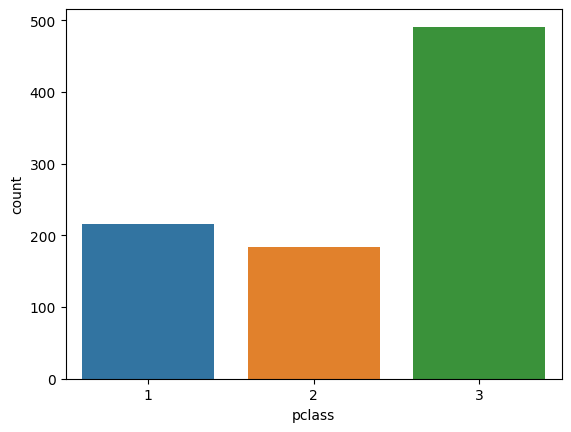

In [13]:
# Distribución de las clases
sns.countplot(x="pclass", data=titanic)

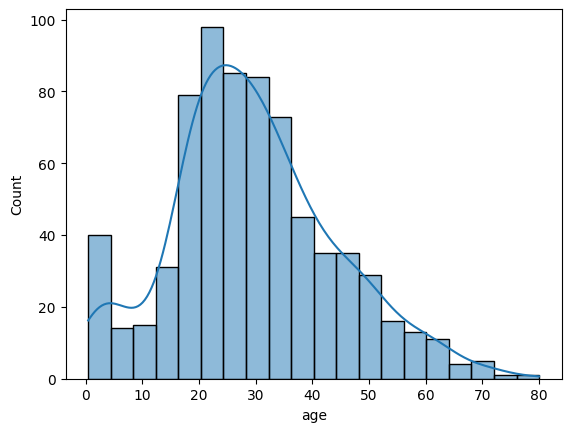

In [14]:
# Distribución de la edad(ege)
sns.histplot(titanic.age.dropna( ),
kde=True)
plt.show( )

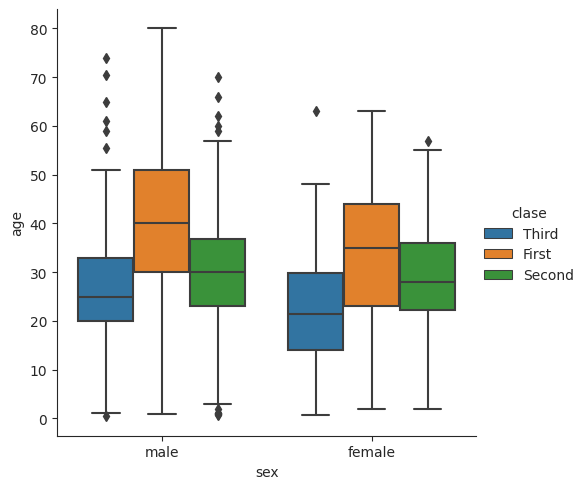

In [15]:
# BoxPlot de la edad por sexo y clase
with sns.axes_style(style='ticks'):
  ax = sns.catplot(data=titanic, x='sex', y='age', hue='clase', kind='box')

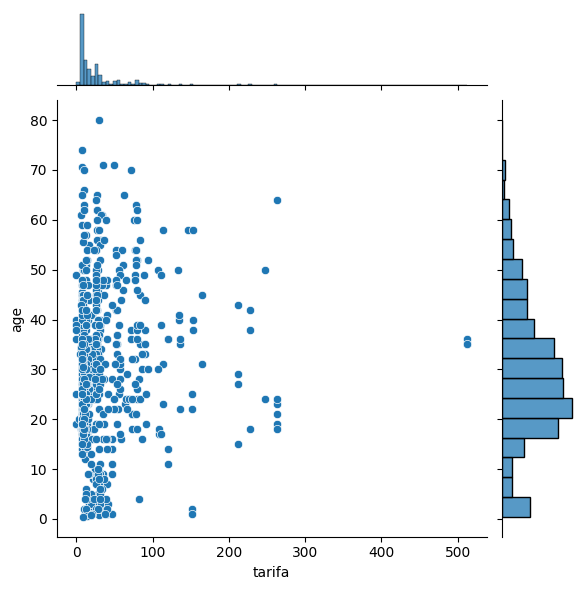

In [16]:
# Distribución cruzada de Edad y Tarifa
sns.jointplot(x='tarifa',y='age',data=titanic)

In [17]:
#Cambiamos el font
sns.set(font_scale=1)

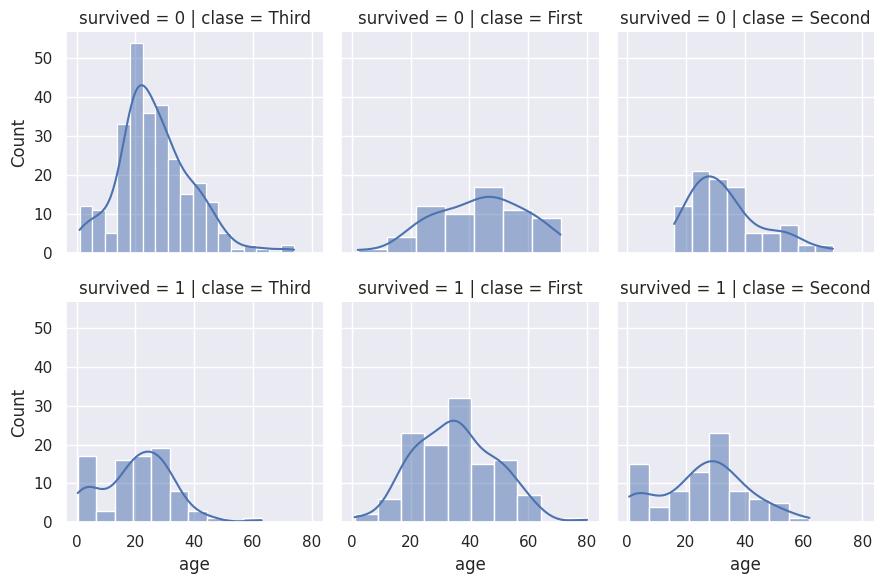

In [18]:
#FacetGrid - Construir una matriz de gráficos
g = sns.FacetGrid(titanic, row='survived', col='clase')
g.map(sns.histplot,'age', kde=True)
plt.show()

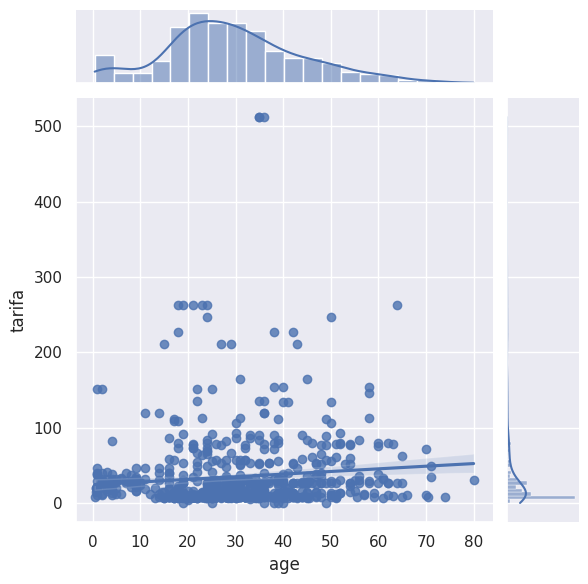

In [19]:
# Diagrama de dispersion con Distribucion de cada variable: fare(precio)/age(edad)
sns.jointplot(data=titanic, x='age', y='tarifa', kind='reg', color='b')
plt.show()

In [20]:
# función para realizar correlación visual
def analyze_correlation(dataframe):
    # Crear la matriz de correlación
    correlation_matrix = dataframe.corr()

    # Graficar mediante mapa de calor la matriz
    plt.figure(figsize=(9, 7))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"fontsize": 8})
    plt.title("Correlation Matrix")
    plt.show()

<ipython-input-20-703f9a47e51a>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataframe.corr()


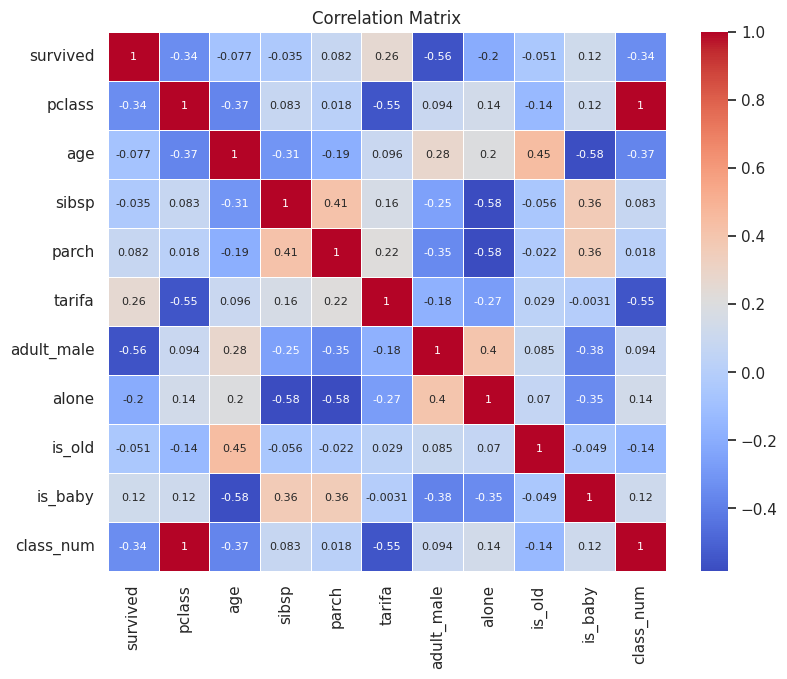

In [21]:
analyze_correlation(titanic)

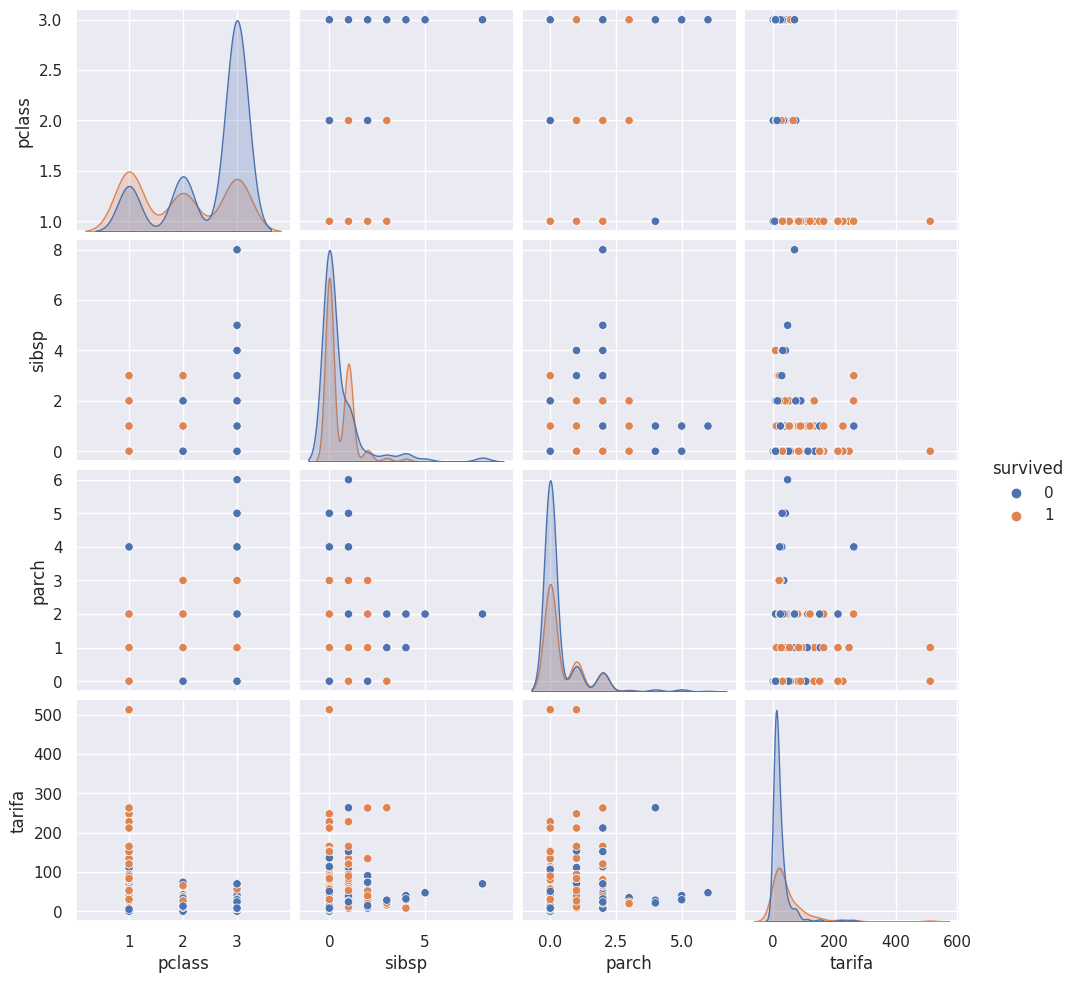

In [22]:
# Define un subconjuto de datos con las variables numéricas
titanic_num = titanic[['survived','pclass','sibsp','parch','tarifa']]

# Hace una matriz de diagramas de dispersión de parejas de variables
sns.pairplot(titanic_num, hue="survived")

plt.show()

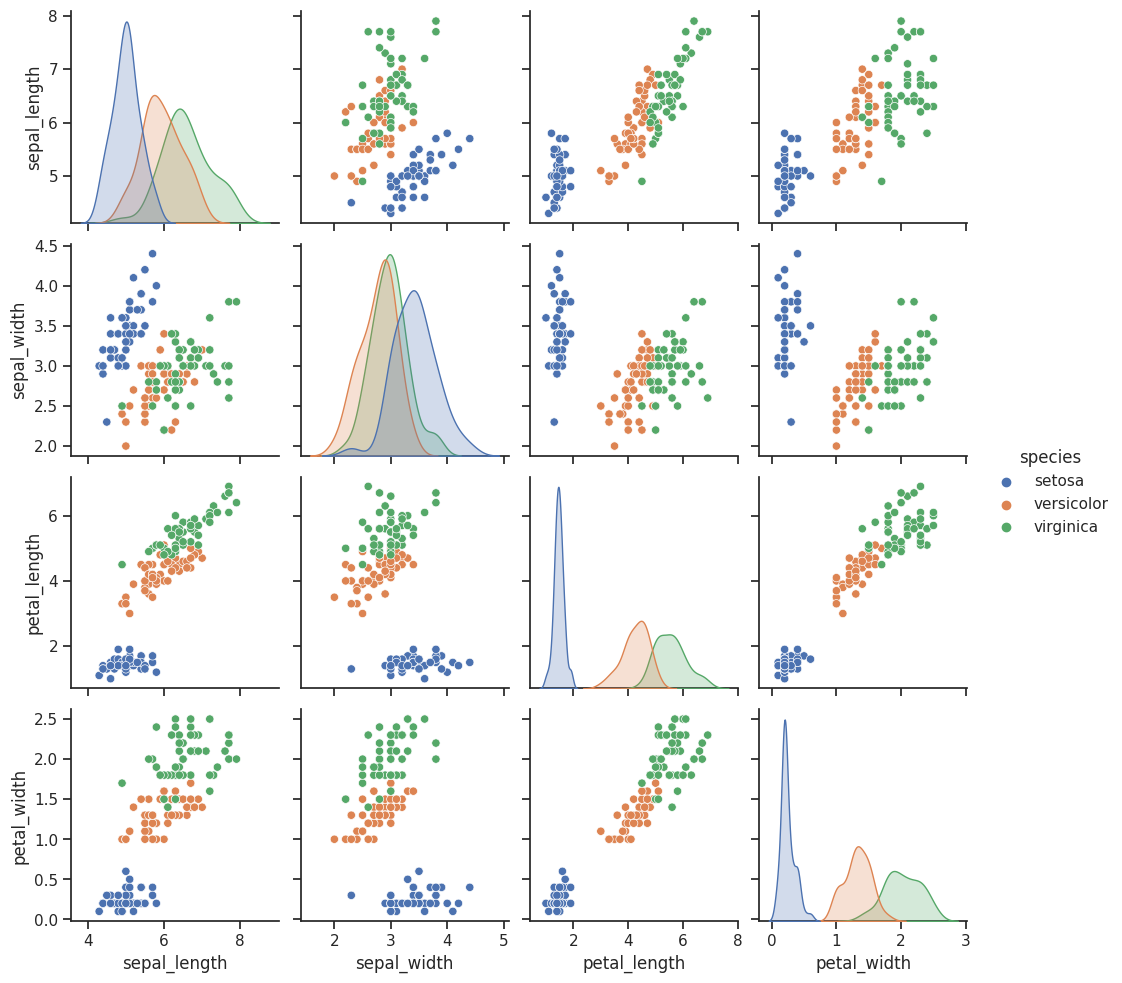

In [23]:
# Establece el estilo estético de las tramas
sns.set(style="ticks")

# Carga el data set
df = sns.load_dataset("iris")

# matriz de diagramas de dispersion
sns.pairplot(df, hue="species")

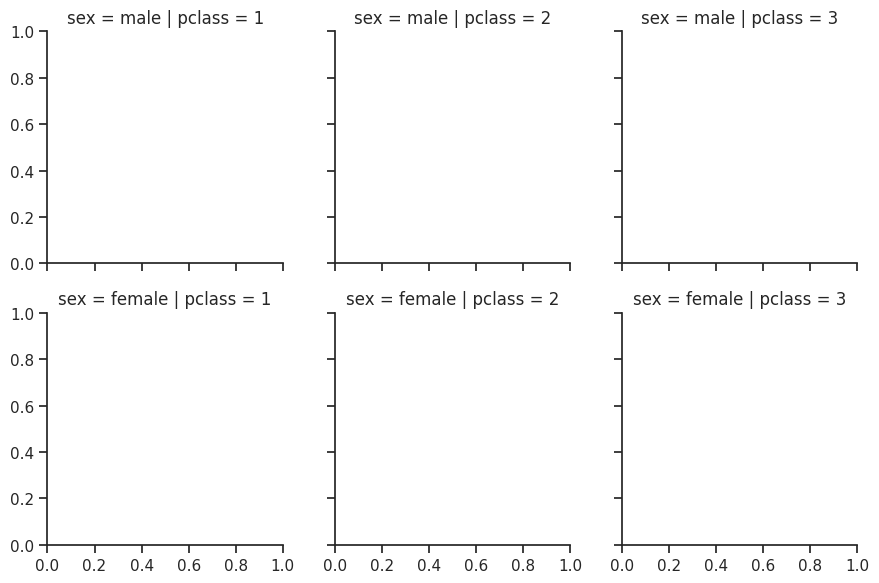

In [38]:
# Crear el diagrama de distribución utilizando Seaborn
# for gender in ['male', 'female']:
#    filtered_data = titanic[titanic['sex'] == gender]
#    sns.displot(data=filtered_data, x='age', hue='survived', col='pclass', multiple='stack', height=4)

g = sns.FacetGrid(data=titanic, row='sex', col='pclass', hue='survived')
# Mostrar el diagrama
plt.show()

In [37]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby,class_num
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False,False,3
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False,False,3
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False,False,3
